<a href="https://colab.research.google.com/github/bilal99u/PCA_penguins_dataset/blob/main/PCA_Peng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cumulative variance: [ 42.3366869   69.52526239  85.51677707  93.4290379   96.76764062
  98.89577701 100.         100.         100.        ] %
Explained variance ratio: [4.23366869e-01 2.71885755e-01 1.59915147e-01 7.91226083e-02
 3.33860272e-02 2.12813639e-02 1.10422299e-02 6.63512375e-17
 5.90401805e-18]


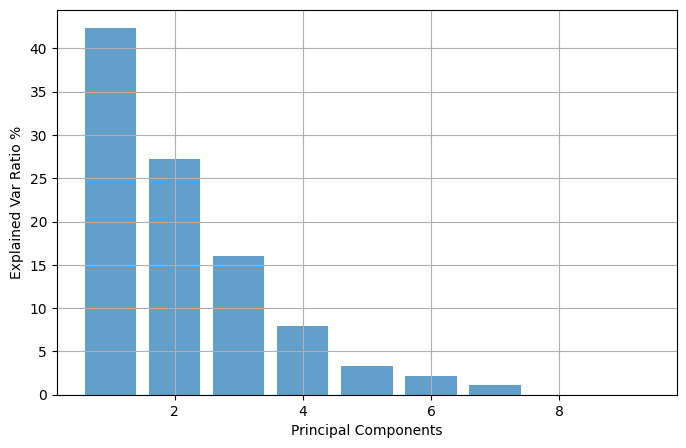

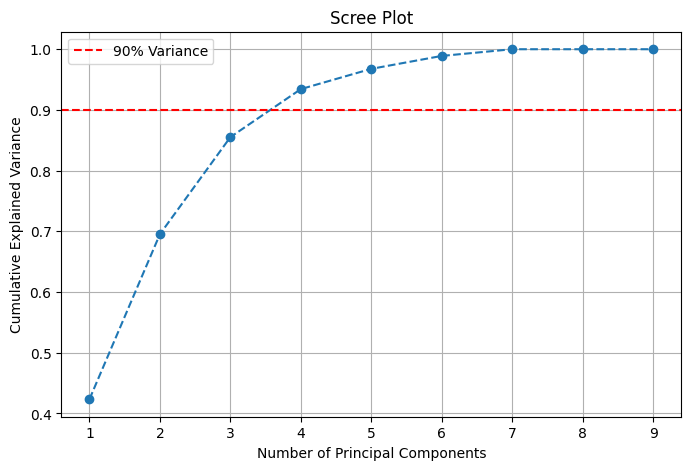

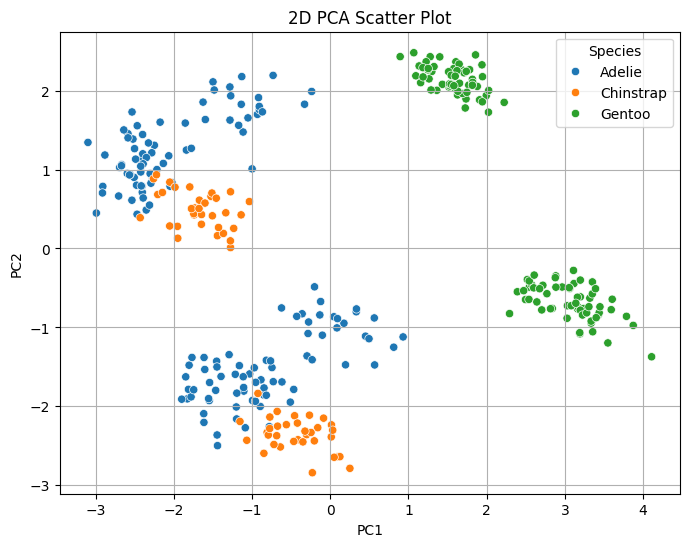

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df = sns.load_dataset("penguins")
df.head()


clean_rows = []

for index, row in df.iterrows():
  if not row.isna().any():
    clean_rows.append(row)
df_clean = pd.DataFrame(clean_rows)

targ = df_clean["species"]
df_clean = df_clean.drop(columns = "species")
encoded = pd.get_dummies(df_clean)
encoded.head()

sclr = StandardScaler()
ss_data = sclr.fit_transform(encoded)
ss_data_df = pd.DataFrame(ss_data, columns = encoded.columns.tolist())
ss_data_df.head()
pca_obj = PCA()

data_pca = pca_obj.fit_transform(ss_data_df)
explained_var_ratio = pca_obj.explained_variance_ratio_
cumulative_variance = explained_var_ratio.cumsum()
print("Cumulative variance:", cumulative_variance*100, "%")
print("Explained variance ratio:", explained_var_ratio)

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_var_ratio)+1), explained_var_ratio[:]*100, alpha = 0.7)
plt.ylabel("Explained Var Ratio %")
plt.xlabel("Principal Components")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=targ)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Scatter Plot")
plt.legend(title="Species")
plt.grid(True)
plt.show()
